本篇主要運用Python兩個資料視覺化函式庫Matplotlib以及Seaborn兩種工具，

一、Matplotlib

﹒Matplotlib 同時也是經典的 Python 視覺化繪圖庫， Matplotlib 就是 MATLAB + Plot + Library 的簡稱，因為是模仿 MATLAB 建立的繪圖庫，所以繪圖風格與 MATLAB 有點類似。
．能處理幾乎所有二維以及三維的資料視覺化圖形
．自定義程度高，能夠自由調整各類參數決定圖形的呈現、標籤

1. 載入套件

In [87]:
import csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

2. 載入資料

本份檔案包含不同類別鋼鐵的資料，包含長度、亮度、面積等資訊
鋼鐵的類別為: Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults。此處想了解各種鋼鐵類別間，是否有因為不同的屬性差異造成不同分類結果，或者是屬性之間有相關性，因此用視覺化方式呈現

In [90]:
df = pd.read_csv('faults_1.csv')
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


3. 資料預處理

In [92]:
# 設定條件清單
conditions = [
    (df['Pastry'] == 1) & (df['Z_Scratch'] == 0) & (df['K_Scatch'] == 0) & (df['Stains'] == 0) & (df['Dirtiness'] == 0) & (df['Bumps'] == 0) & (df['Other_Faults'] == 0),
    (df['Pastry'] == 0) & (df['Z_Scratch'] == 1) & (df['K_Scatch'] == 0) & (df['Stains'] == 0) & (df['Dirtiness'] == 0) & (df['Bumps'] == 0) & (df['Other_Faults'] == 0),
    (df['Pastry'] == 0) & (df['Z_Scratch'] == 0) & (df['K_Scatch'] == 1) & (df['Stains'] == 0) & (df['Dirtiness'] == 0) & (df['Bumps'] == 0) & (df['Other_Faults'] == 0),
    (df['Pastry'] == 0) & (df['Z_Scratch'] == 0) & (df['K_Scatch'] == 0) & (df['Stains'] == 1) & (df['Dirtiness'] == 0) & (df['Bumps'] == 0) & (df['Other_Faults'] == 0),
    (df['Pastry'] == 0) & (df['Z_Scratch'] == 0) & (df['K_Scatch'] == 0) & (df['Stains'] == 0) & (df['Dirtiness'] == 1) & (df['Bumps'] == 0) & (df['Other_Faults'] == 0),
    (df['Pastry'] == 0) & (df['Z_Scratch'] == 0) & (df['K_Scatch'] == 0) & (df['Stains'] == 0) & (df['Dirtiness'] == 0) & (df['Bumps'] == 1) & (df['Other_Faults'] == 0),
    (df['Pastry'] == 0) & (df['Z_Scratch'] == 0) & (df['K_Scatch'] == 0) & (df['Stains'] == 0) & (df['Dirtiness'] == 0) & (df['Bumps'] == 0) & (df['Other_Faults'] == 1)
]

# 設定選項清單
choices = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df['class'] = np.select(conditions, choices)

# 刪除多餘columns
drp_cols = ['TypeOfSteel_A400','Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,class
0,42,50,270900,270944,267,17,44,24220,76,108,...,-0.2913,0.5822,1,0,0,0,0,0,0,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,-0.1756,0.2984,1,0,0,0,0,0,0,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,-0.1228,0.2150,1,0,0,0,0,0,0,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,-0.1568,0.5212,1,0,0,0,0,0,0,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,-0.1992,1.0000,1,0,0,0,0,0,0,Pastry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.0026,0.7254,0,0,0,0,0,0,1,Other_Faults
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.0582,0.8173,0,0,0,0,0,0,1,Other_Faults
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.0052,0.7079,0,0,0,0,0,0,1,Other_Faults
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0171,0.9919,0,0,0,0,0,0,1,Other_Faults


4. 繪圖
以下以matplotlib中五種圖形的使用與語法，並以上述鋼鐵資料集來做為範例


1.直方圖：plt.hist(x)
2.長條圖：plt.bar(x, y)
3.散佈圖：plt.scatter(x, y)
4.盒狀圖：plt.boxplot(x, y)
5.折線圖：plt.plot(x, y)

直方圖(histogram)

常被用來表達「連續數值資料」的分布
以下以我們觀察在資料集當中的"最小亮度"的分布情形

<function matplotlib.pyplot.show(close=None, block=None)>

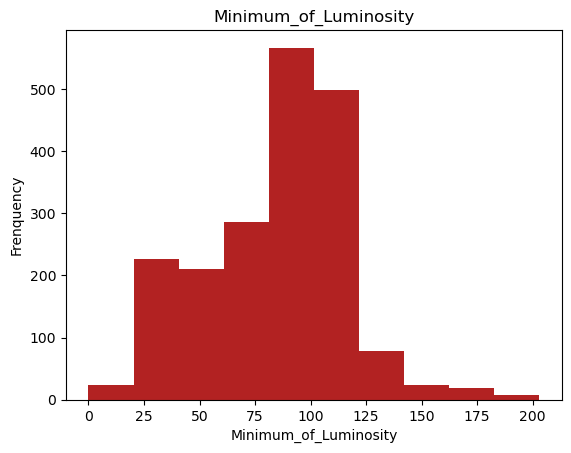

In [97]:
plt.hist(df["Minimum_of_Luminosity"], bins = 10, color = 'firebrick')# 畫出直方圖，bins為區間數
plt.xlabel("Minimum_of_Luminosity")# .xlabel是x軸
plt.ylabel("Frenquency")# .ylabel是y軸
plt.title("Minimum_of_Luminosity")# .title替圖片取名
plt.show

疊加直方圖

常用情境：比較不同類別的數據在某一特徵上的分佈。
此處繪製疊加直方圖，展示不同類別鋼鐵的最小亮度(Minimum_of_Luminosity)分佈，並通過顏色區分每個類別的數據

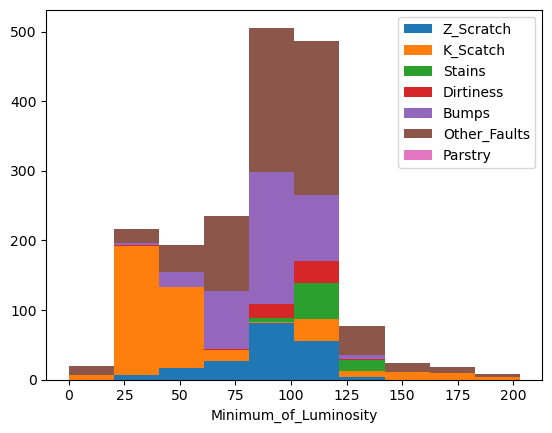

In [100]:
# 將所有類別裡的數據按順序存入列表
categories = ['Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults', 'Parstry']
data = [df[df['class'] == cat]["Minimum_of_Luminosity"] for cat in categories]

# 繪製疊加直方圖
plt.hist(data, label = categories, stacked = True)
plt.xlabel('Minimum_of_Luminosity')
plt.legend()
plt.show()

長條圖(Bar Chart) 

適用類別型數據（分類）

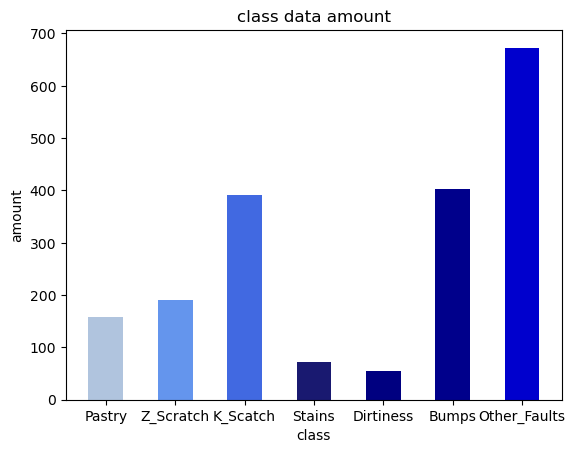

In [103]:
colors = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'midnightblue', 'navy', 'darkblue', 'mediumblue']

# 【知道每個類別的數據數量，以便後續作為條形圖的高度(y軸數據)】
# 取 df 中 class 欄位的數據
# 計算每個類別出現的次數
# 保持類別的原始順序
count = df['class'].value_counts(sort = False)

# 【提取條形圖的高度數據】
# for i in choices：遍歷清單 choices 中的每個類別名稱
# count[i]：取出該類別對應的數量
# []：將遍歷結果組成一個清單
y = [count[i] for i in choices]

# 【繪製條形圖】
plt.bar(df['class'].unique(), y, color=colors, width=0.5)
plt.xlabel('class')
plt.ylabel('amount')
plt.title('class data amount')
plt.show()

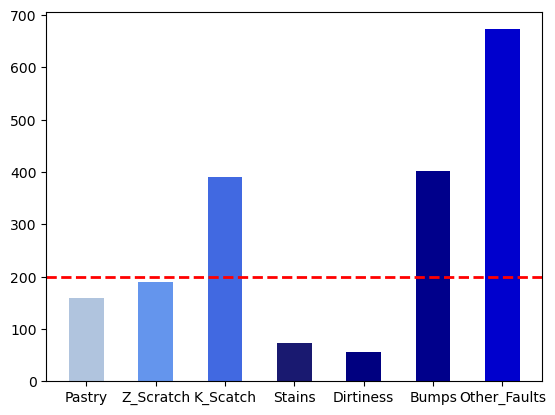

In [104]:
plt.bar(df['class'].unique(), y, color=colors, width=0.5)
plt.axhline(y=200, c="r", ls="--", lw=2)
plt.show()

散佈圖

散佈圖(Scatter Plot)，通常用於描繪兩筆資料之間的相關程度，在進行機器學習或是資料科學的運用時，這樣的特性也使其多被用在feature engineering時的參考，是一種很常見的圖形
透過以下範例我們可以看到鋼鐵面積與總亮度呈現正相關。

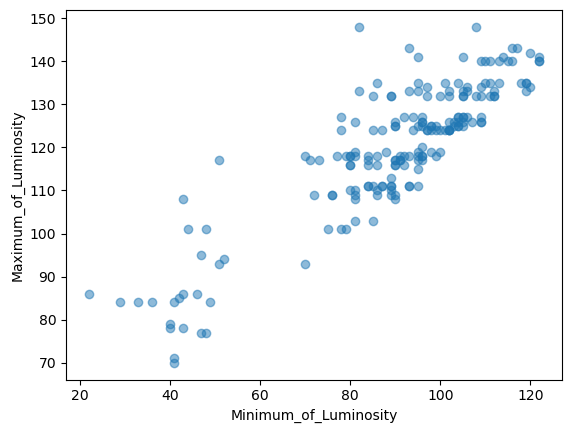

In [107]:
plt.scatter('Minimum_of_Luminosity', 'Maximum_of_Luminosity', data=df[df["class"] == 'Z_Scratch'], alpha=0.5)
plt.xlabel('Minimum_of_Luminosity')
plt.ylabel('Maximum_of_Luminosity')
plt.show()

透過散點圖可以輕易發現極端數值(Outliers)，即某些資料點與大多數數據明顯不同，可能代表：
異常資料(Data Errors)
特殊情境(Rare Cases)
可能的缺陷模式(e.g.照片拍攝異常）

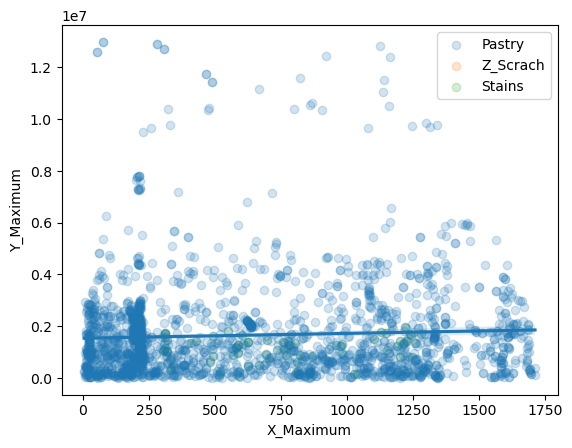

In [109]:
import seaborn as sns
df1 = df[df["class"] == "Pastry"]
df2 = df[df["class"] == "Z_Scrach"]
df3 = df[df["class"] == "Stains"]

plt.scatter("X_Maximum", "Y_Maximum", data=df1, alpha=0.2, label="Pastry")
plt.scatter("X_Maximum", "Y_Maximum", data=df2, alpha=0.2, label="Z_Scrach")
plt.scatter("X_Maximum", "Y_Maximum", data=df3, alpha=0.2, label="Stains")
sns.regplot(x='X_Maximum', y='Y_Maximum', data=df, scatter_kws={'alpha':0.2})
plt.legend()

plt.xlabel("X_Maximum")
plt.ylabel("Y_Maximum")
plt.show()

上圖中加入了一條回歸趨勢線(由sns.regplot繪製)，用於觀察 X_Maximum 和 Y_Maximum 是否存在線性關係。
從圖片上看，回歸線幾乎水平，表示兩個變數之間的相關性不強。

盒鬚圖

盒鬚圖（Box Plot）用於顯示數據的分布情形，並比較不同類別的變異程度。

以下範例呈現三種類別鋼鐵的最小亮度分布。

雖然盒鬚圖標示上下界，但仍可能出現超出範圍的圓點，在Matplotlib中稱為fliers，即離群值(outliers)
這些數據點超過第三四分位數+1.5×四分位距或小於第一四分位數− 1.5×四分位距。

盒鬚圖可用於理解數據分布並識別離群值，離群值的處理方法將在其他篇章介紹。

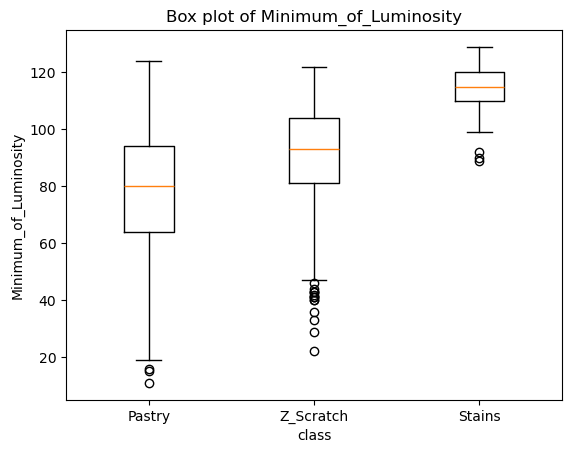

In [115]:
plt.boxplot([
    df[df["class"] == "Pastry"]["Minimum_of_Luminosity"],
    df[df["class"] == "Z_Scratch"]["Minimum_of_Luminosity"],
    df[df["class"] == "Stains"]["Minimum_of_Luminosity"]]
    ,tick_labels = ["Pastry", "Z_Scratch", "Stains"])

plt.ylabel('Minimum_of_Luminosity')
plt.xlabel('class')
plt.title('Box plot of Minimum_of_Luminosity')
plt.show()

折線圖

折線圖 (Line Plot)，常用於呈現單一資料的時間趨勢，或是單一資料的不同群體的時間趨勢，故經常使用在時間序列類型的資料上。
此專案使用的鋼鐵集並無時間序列類型資料，故以下先以其他資料進行繪圖

In [117]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]
stock_tsmcc = [255,246,247.5,227,224,216.5,246,256,262.5,234,225.5,225.5]
stock_foxconn = [92.2,88.1,88.5,82.9,85.7,83.2,83.8,80.5,79.2,78.8,71.9,70.8]

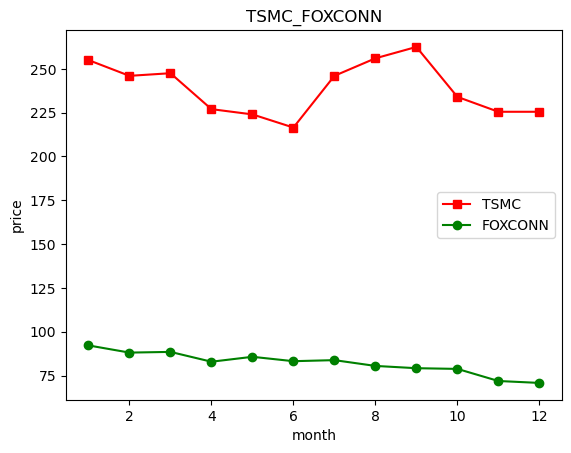

In [119]:
plt.plot(month, stock_tsmcc, 's-', color='r', label='TSMC')
plt.plot(month, stock_foxconn, 'o-', color='g', label='FOXCONN')
plt.title("TSMC_FOXCONN")
plt.xlabel("month")
plt.ylabel("price")
plt.legend()
plt.show()

二、 Seaborn

Seaborn 是 Python 受歡迎的資料視覺化函式庫，基於 Matplotlib 進行高級封裝，比 Matplotlib 有更完整的功能，使得作圖更加方便快捷


In [121]:
import seaborn as sns

直方圖

seaborn 的圖不只不需要自定x軸，甚至連核密度估計曲線都畫出來，若不需要的話也可以將 kde 設為false

<Axes: xlabel='Minimum_of_Luminosity', ylabel='Count'>

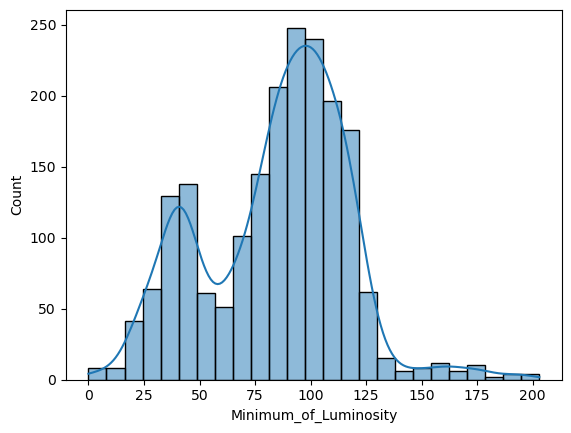

In [131]:
sns.histplot(df["Minimum_of_Luminosity"], kde=True, bins=25)